# Celebrity Look-alike with Computer Vision



**About this project**

With this project, our aim is to discover a fun way to find out which celebrity looks like the person in the photo, the most.

To achieve this, we will be using the **face_recognition library**, which is built using [dlib](http://dlib.net/)’s state-of-the-art face recognition built with deep learning, and is considered one of the simples libraries used for face recognition and manipulation. The model has an accuracy of 99.38% on the Labeled Faces in the Wild benchmark. With this library you can find faces, find and manipulate facial features, and identify faces in pictures. You can also use this library with other Python libraries to do real-time face recognition.

For more information on the **face_recognition** library, you can view their official page from [here](https://pypi.org/project/face-recognition/).

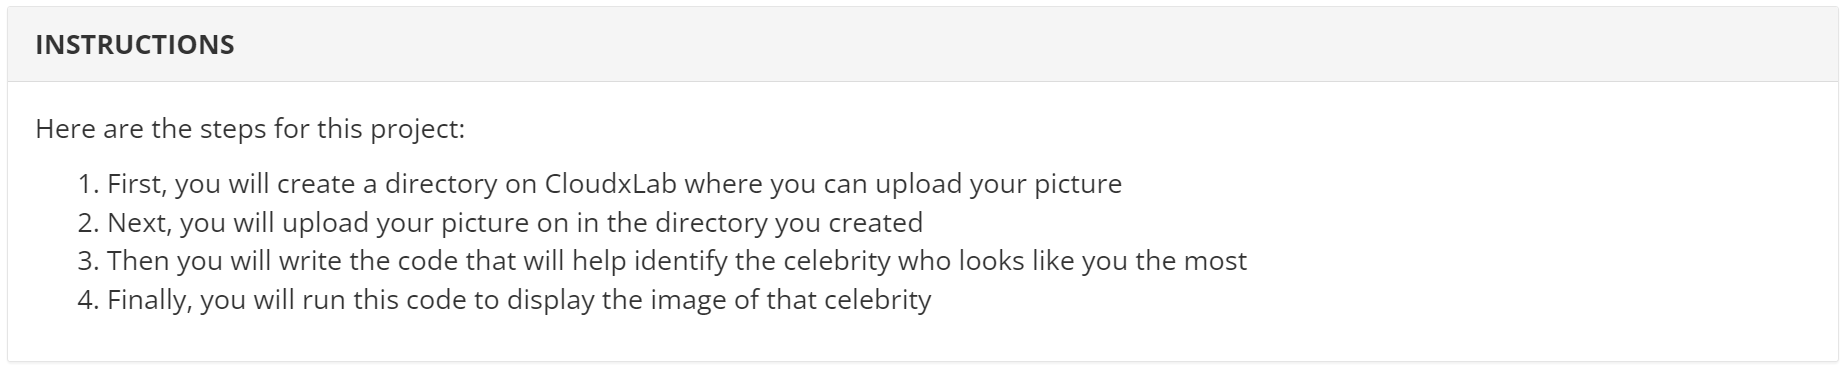

## Create the Directory Structure

First, we create the directory structure to the location where we'll be uploading our photograph.

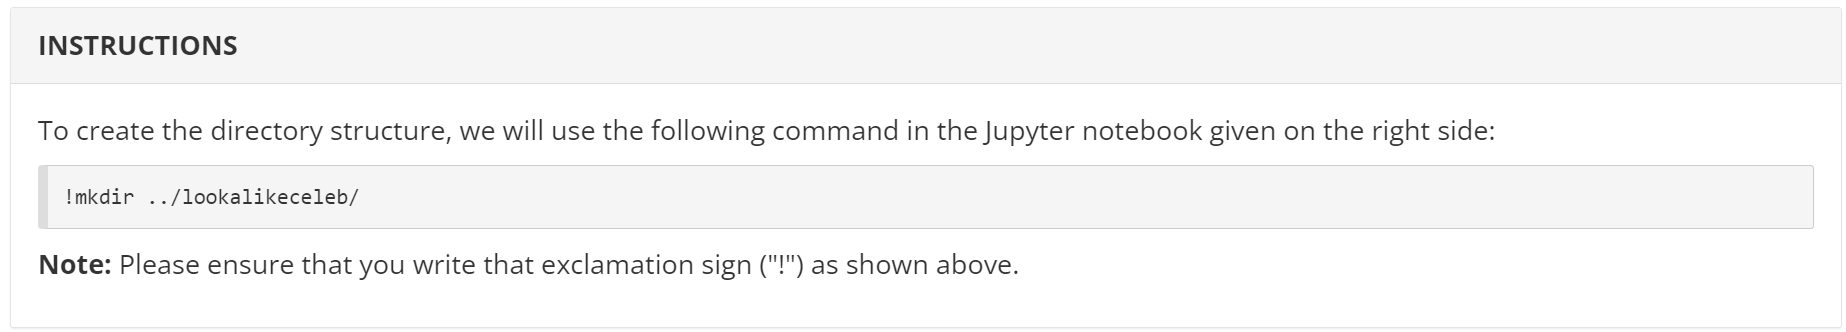

In [1]:
!mkdir ../lookalikeceleb/ #Insert the appropriate Folder Path here

mkdir: cannot create directory ‘../lookalikeceleb/’: File exists


In this step, we will load our picture.
We will use this picture to find out the celebrity who looks like you the most.

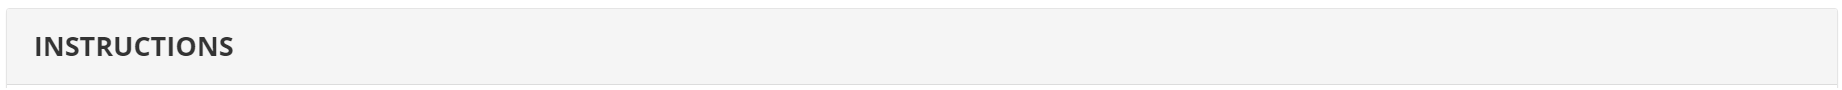

1. First, rename your picture as myimage.jpg on your local computer.
2. Then, navigate to the **lookalikeceleb** folder which in our case is in the root folder where the Notebook is saved.
3. Next, click on lookalikeceleb folder.
4. Upload the image from the local computer to CloudxLab by clicking on the Upload button in JupyterLabs or Google Colab.
5. Once done, go back to the Notebook.

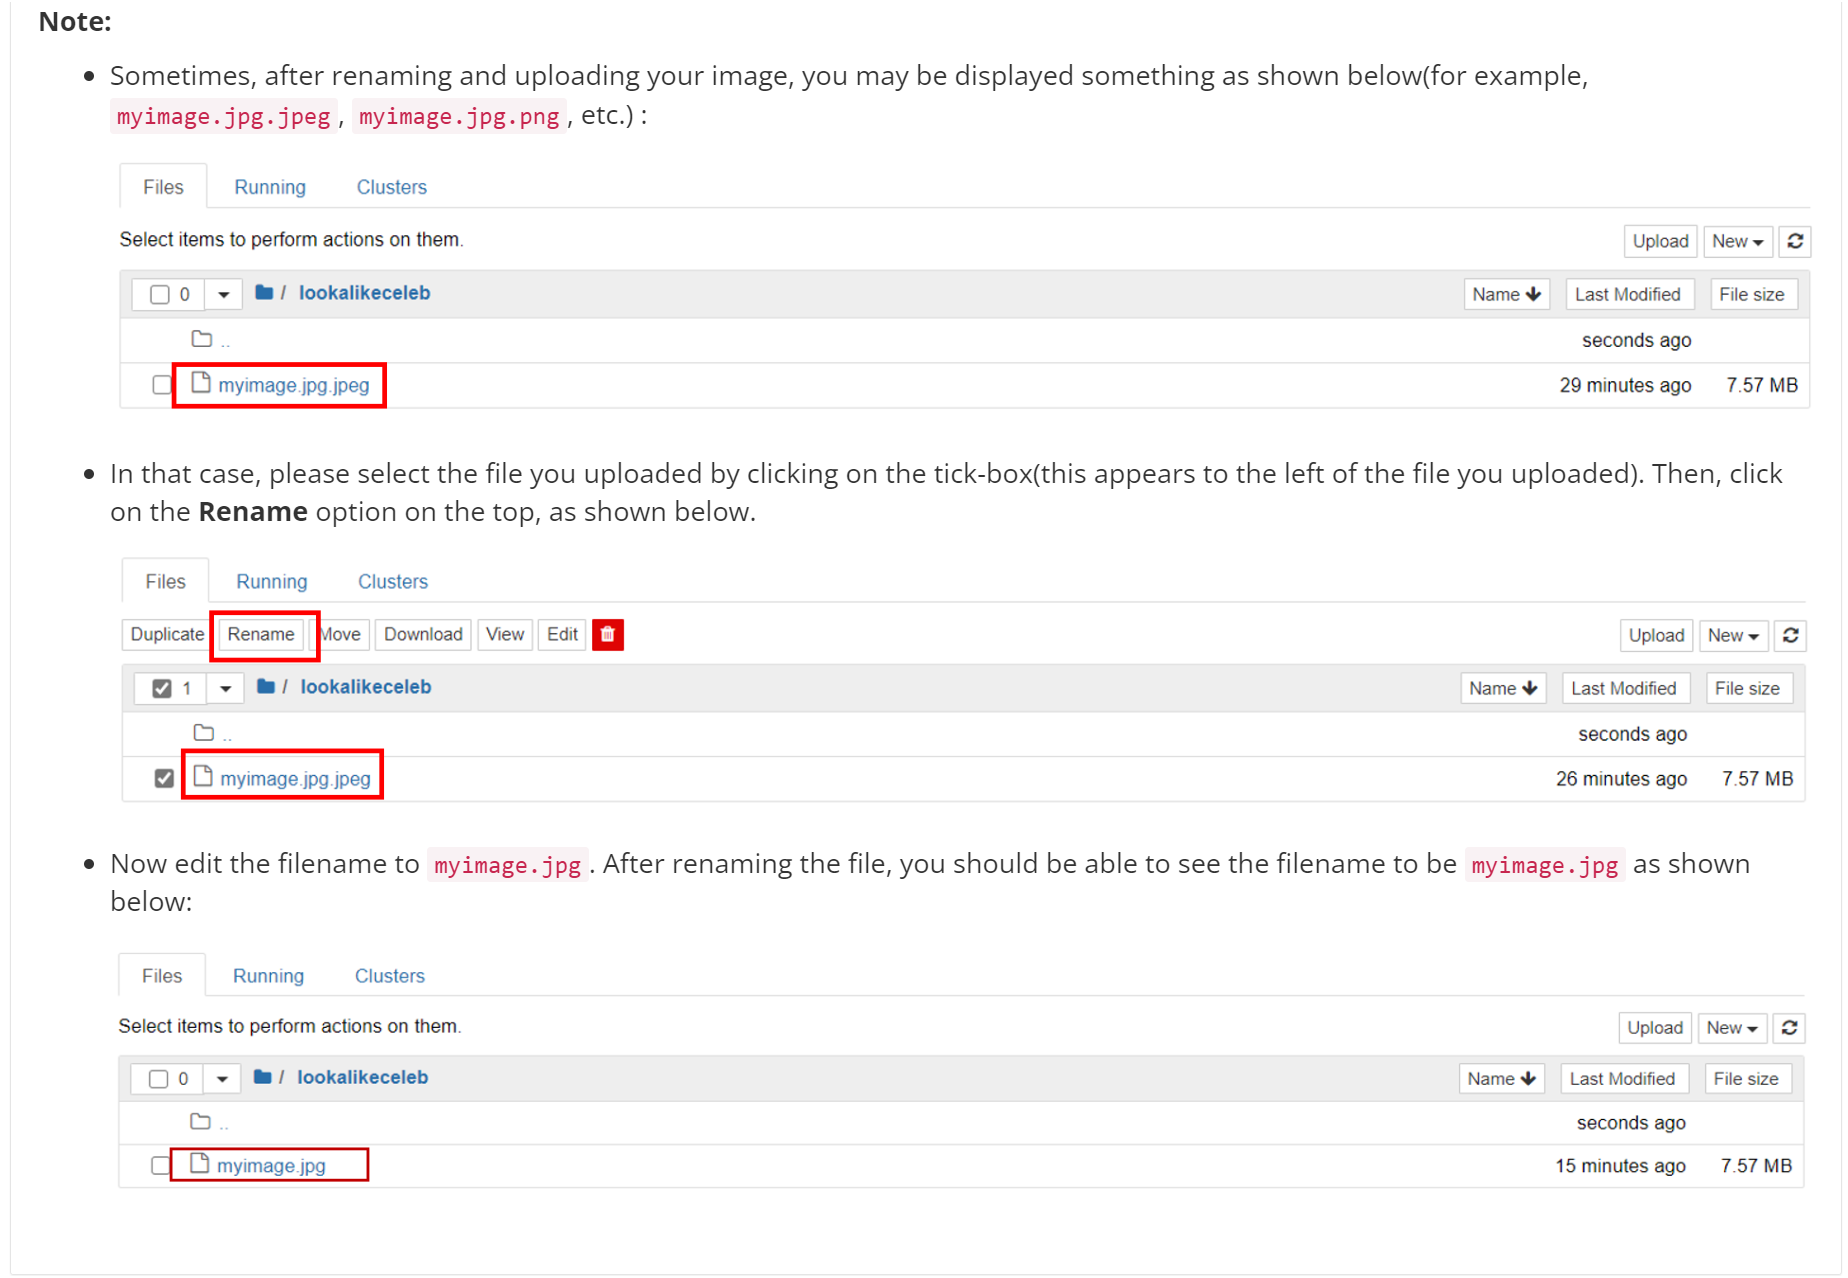

In [2]:
ls ~/lookalikeceleb/

images/  my_image_01.jpg  my_image.jpg


# Import required Libraries

Now that we have successfully created the directory and uploaded your picture in that directory, we will start writing the code by importing the libraries that we will require during the course of this project.

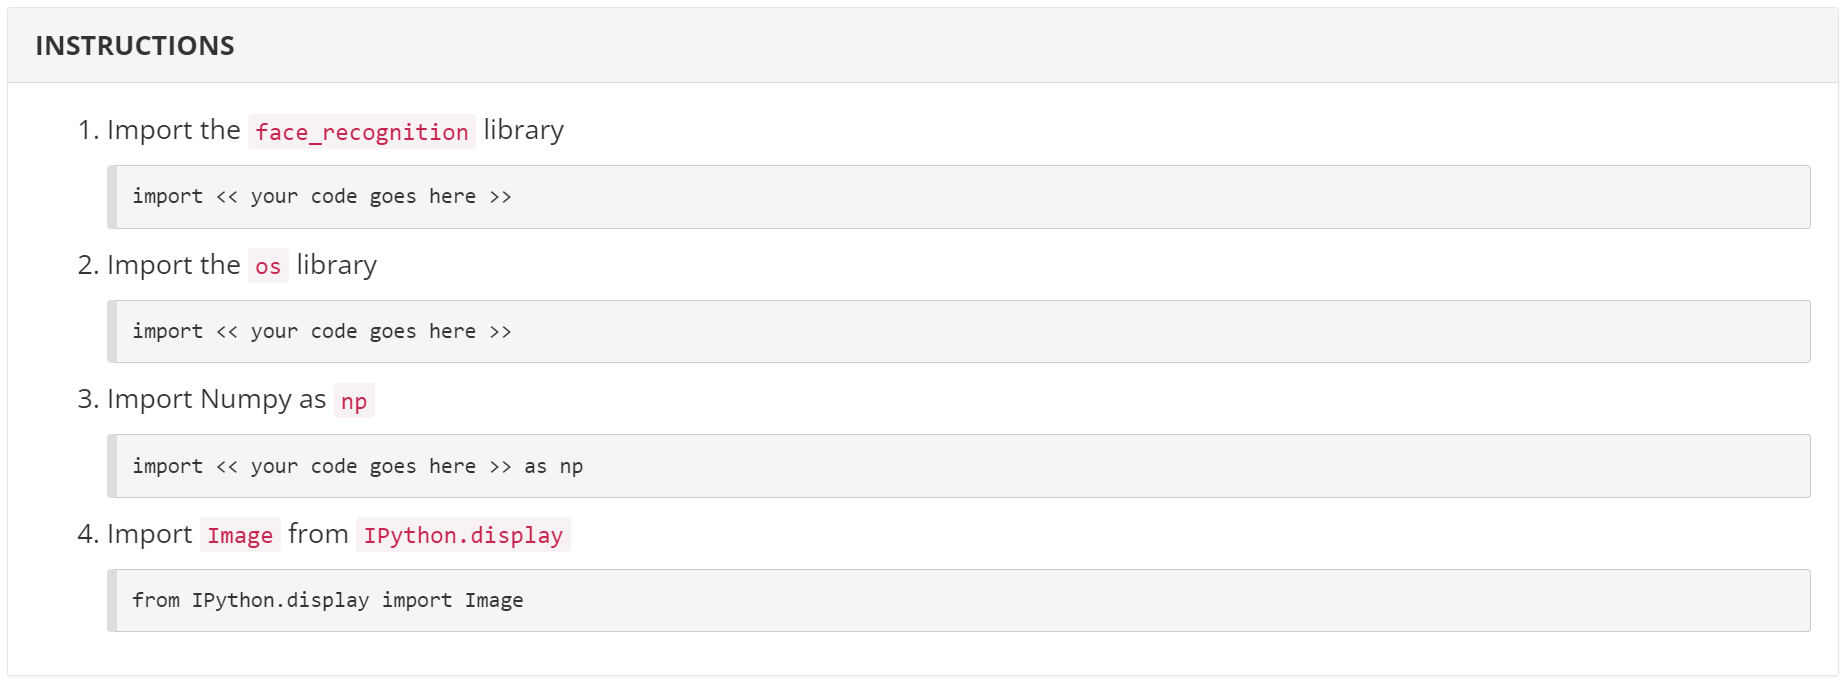

In [3]:
import face_recognition
import os
import numpy as np
from IPython.display import Image

# Create Function to Load Images and Face Encodings

In this step, we will write the code to load the image (which was uploaded from the local computer) and it's related to face embedding. Here are what some of those functions that we have used below do:

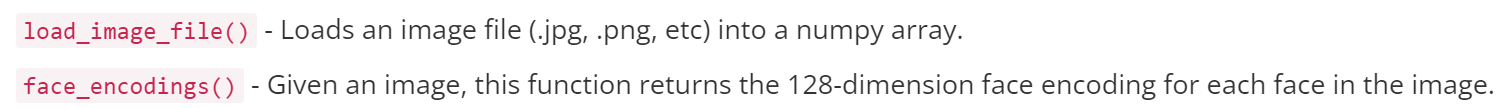

**What are Face Embeddings?**
In 2015, researchers at Google introduced FaceNet. It is a deep neural network used for extracting features from an image of a person's face. FaceNet takes that image of the person's face as an input, and it gives vector of 128 numbers as an output. This output represent the most important features of that person's face. In machine learning, this vector is called embedding. The face_recognition library used in this project uses FaceNet to find out the face embeddings.

**Example of Face Embeddings:**
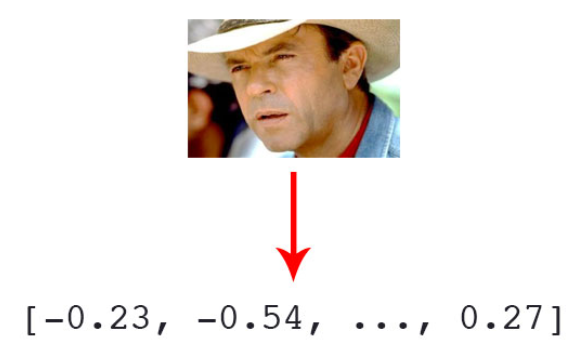
**Note:** Face encoding and embedding are the same things and these words will be used interchangeable throughout this project.

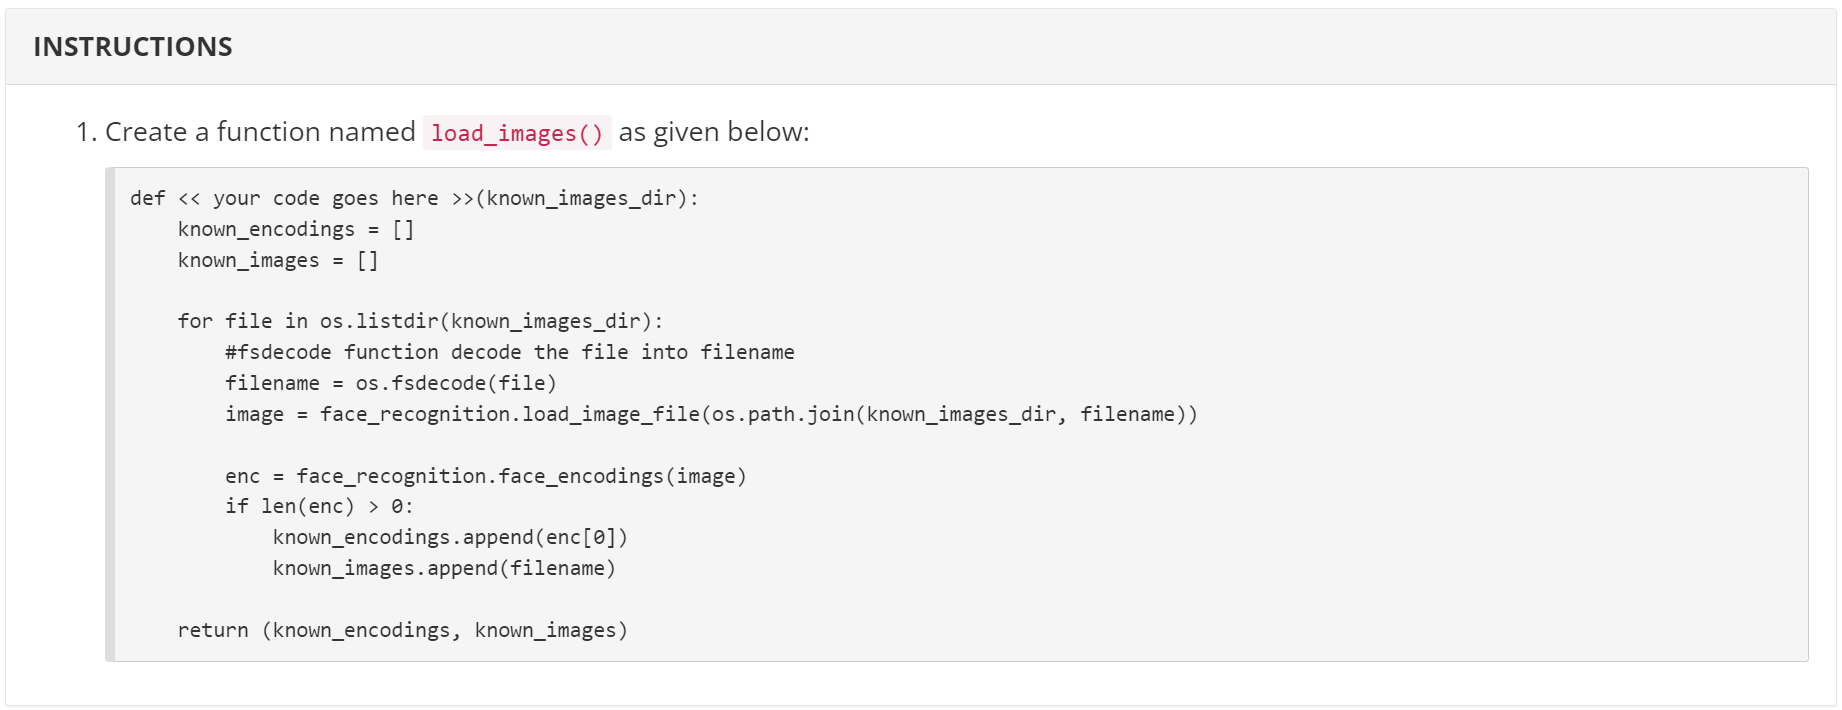

In [4]:
def load_images(known_images_dir):
    known_encodings = []
    known_images = []
    
    for file in os.listdir(known_images_dir):
        #Use the fsdecode function to decode the file into filename
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir, filename))
        
        enc = face_recognition.face_encodings(image)
        if len(enc) > 0:
            known_encodings.append(enc[0])
            known_images.append(filename)
            
    return (known_encodings, known_images)

# Let's Calculate Euclidean Distance

Now, we would write a function that calculates the Euclidean distance between the face embeddings that we calculated in the previous steps. This is done to see how far apart the test image is from the known faces. It returns the distance that is minimum, and the path to that image.

**What is Euclidean Distance?**
The Euclidean distance (also known as the Pythagorean distance) between two points in Euclidean space is the length of a line segment between those two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem. Given below is the formula to calculate the Euclidean distance between 2 points in n-dimensional space:
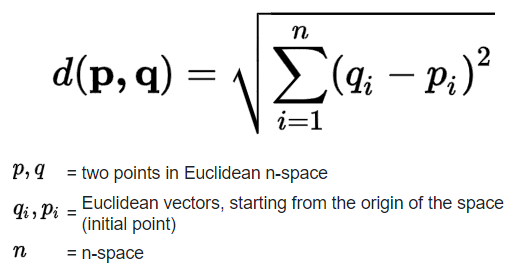

Here, the <span style="color:red">face_distance()</span> function compares a list of face encodings to a known face encoding and get a Euclidean distance for each comparison face. The distance tells you how similar the faces are.

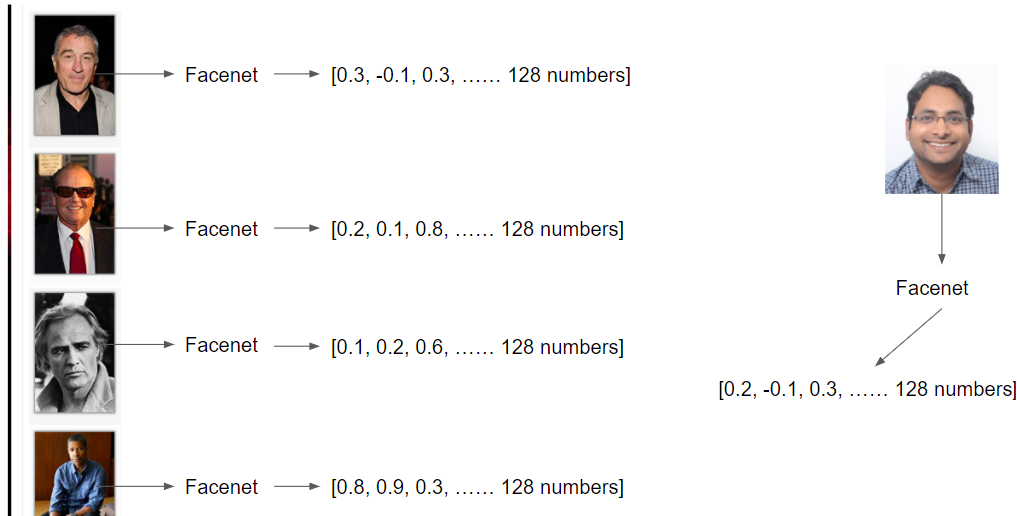

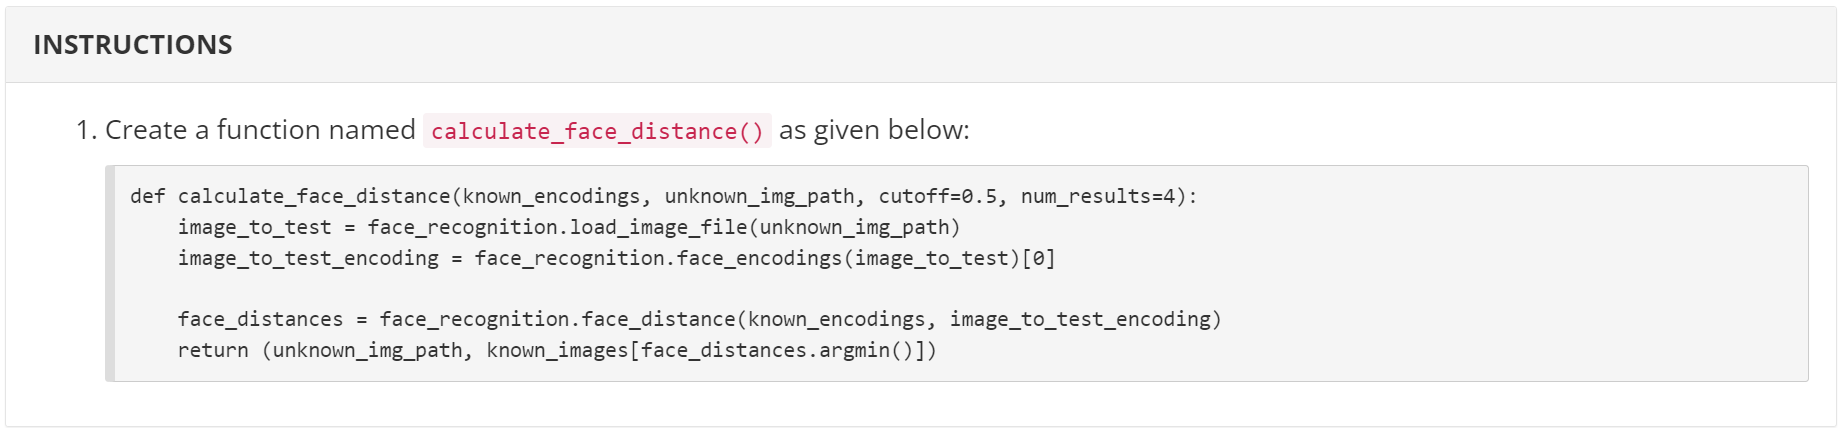

In [5]:
def calculate_face_distance(known_encodings, unknown_img_path, cutoff=0.5, num_results=4):
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]
    
    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return (unknown_img_path, known_images[face_distances.argmin()])

# Load the Image

Now we will load the image we uploaded from the local computer, and the folder containing the celebrity images using the <span style="color:red">load_images()</span> function we created earlier.

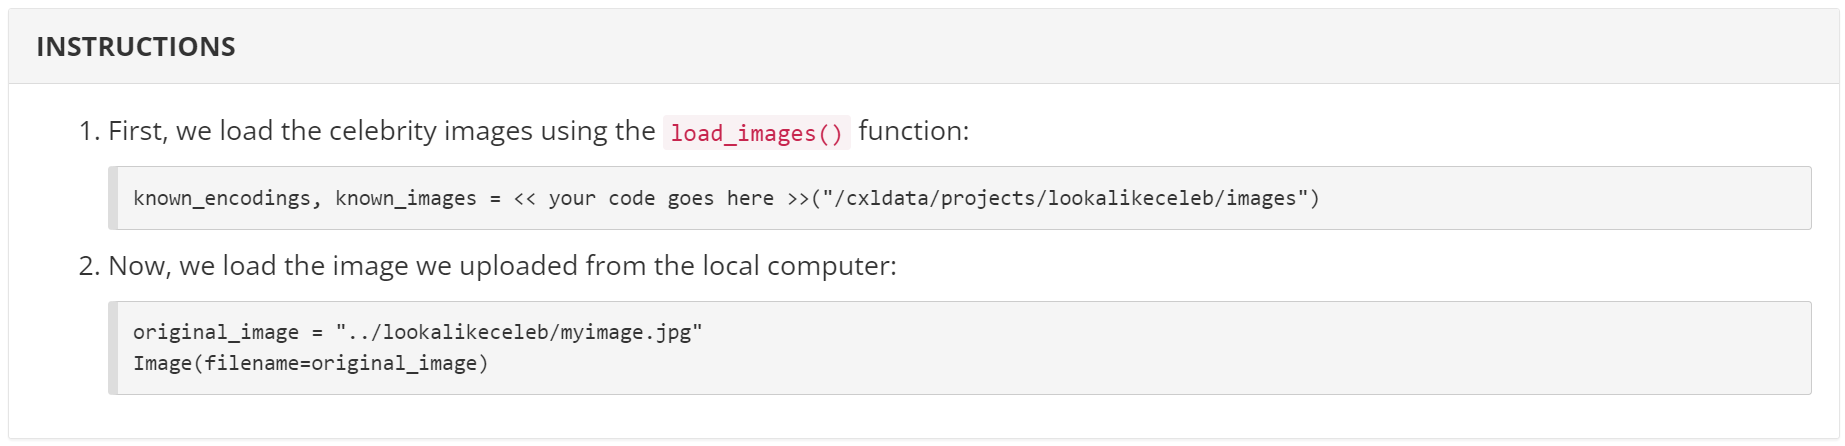

In [6]:
known_encodings, known_images = load_images("/cxldata/projects/lookalikeceleb/images")

/usr/local/anaconda/lib/python3.6/site-packages/PIL/Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


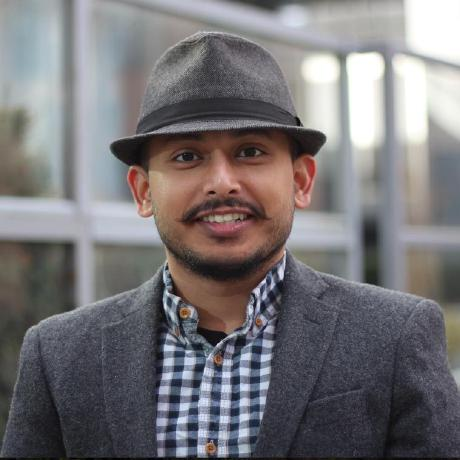

In [7]:
original_image = "../lookalikeceleb/my_image.jpg"
Image(filename=original_image)

# Find the Matching Celebrity Image

Finally, in this step we will find the matching celebrity image against the image we uploaded from the local computer. This is what the final output will look like:

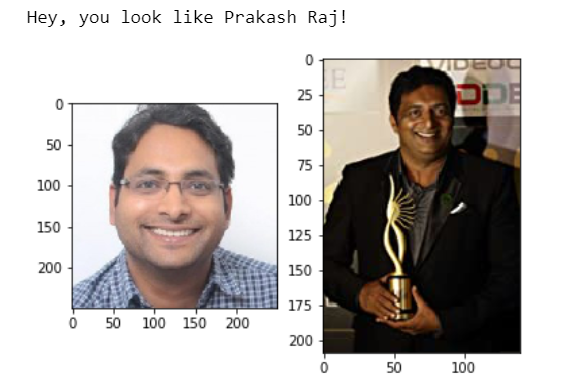

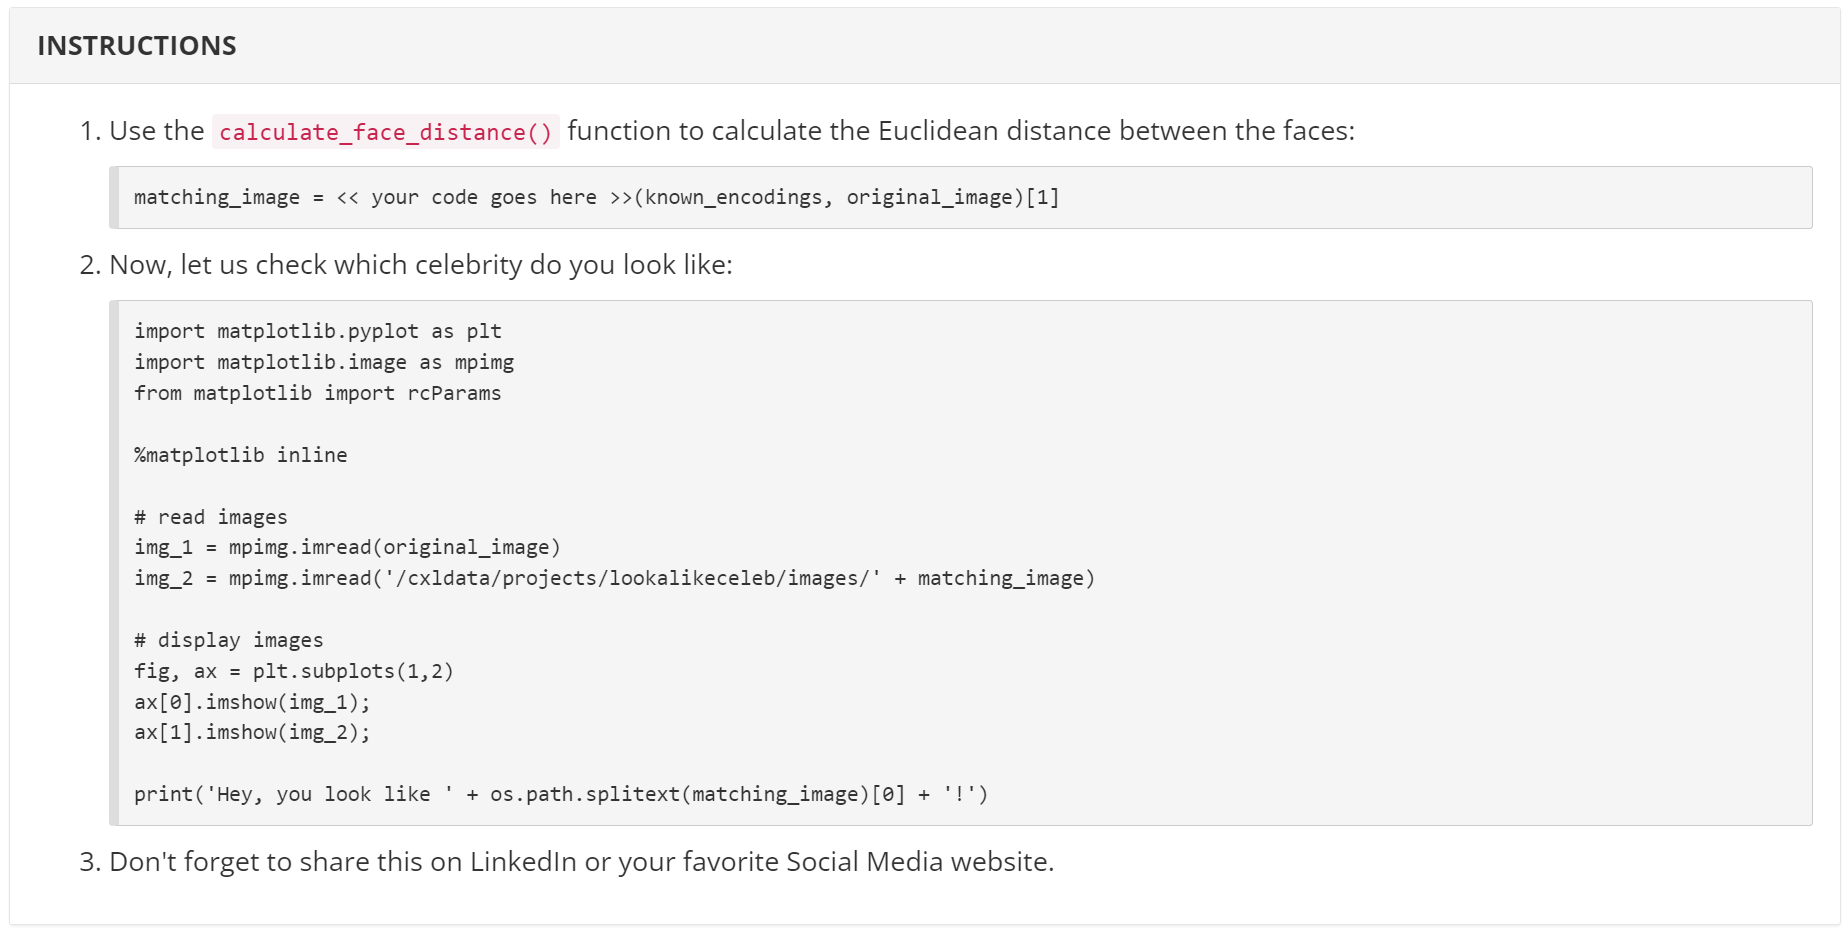

In [8]:
matching_image = calculate_face_distance(known_encodings, original_image)[1]

Hey, you look like Johnny Depp!


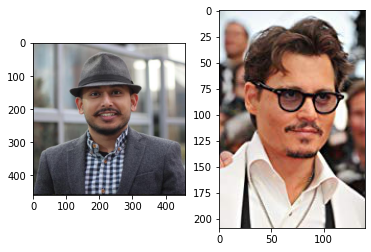

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# read images
img_1 = mpimg.imread(original_image)
img_2 = mpimg.imread('/cxldata/projects/lookalikeceleb/images/' + matching_image)

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1);
ax[1].imshow(img_2);

print('Hey, you look like ' + os.path.splitext(matching_image)[0] + '!')